# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [41]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [42]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [43]:
reg_tip = smf.ols('tip ~ sex + smoker + time + net_bill', data=tips).fit()
tips['res_tip'] = reg_tip.resid
reg_tip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           2.64e-20
Time:                        10:13:11   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
reg_tip = smf.ols('tip ~ sex + net_bill', data=tips).fit()
tips['res_tip'] = reg_tip.resid
reg_tip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     60.04
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           6.94e-22
Time:                        10:55:10   Log-Likelihood:                -375.62
No. Observations:                 244   AIC:                             757.2
Df Residuals:                     241   BIC:                             767.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.3382      0.185      7.218      0.000       0.973       1.703
sex[T.Female]    -0.0150      0.153     -0.098      0.922      -0.317       0.287
net_bill          0.0992      0.009     10.827      0.000       0.081       0.117
==============================================================================
Omnibus:                       33.672   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.346
Skew:                           0.752   Prob(JB):                     1.30e-13
Kurtosis:                       4.892   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='sex', ylabel='res_tip'>

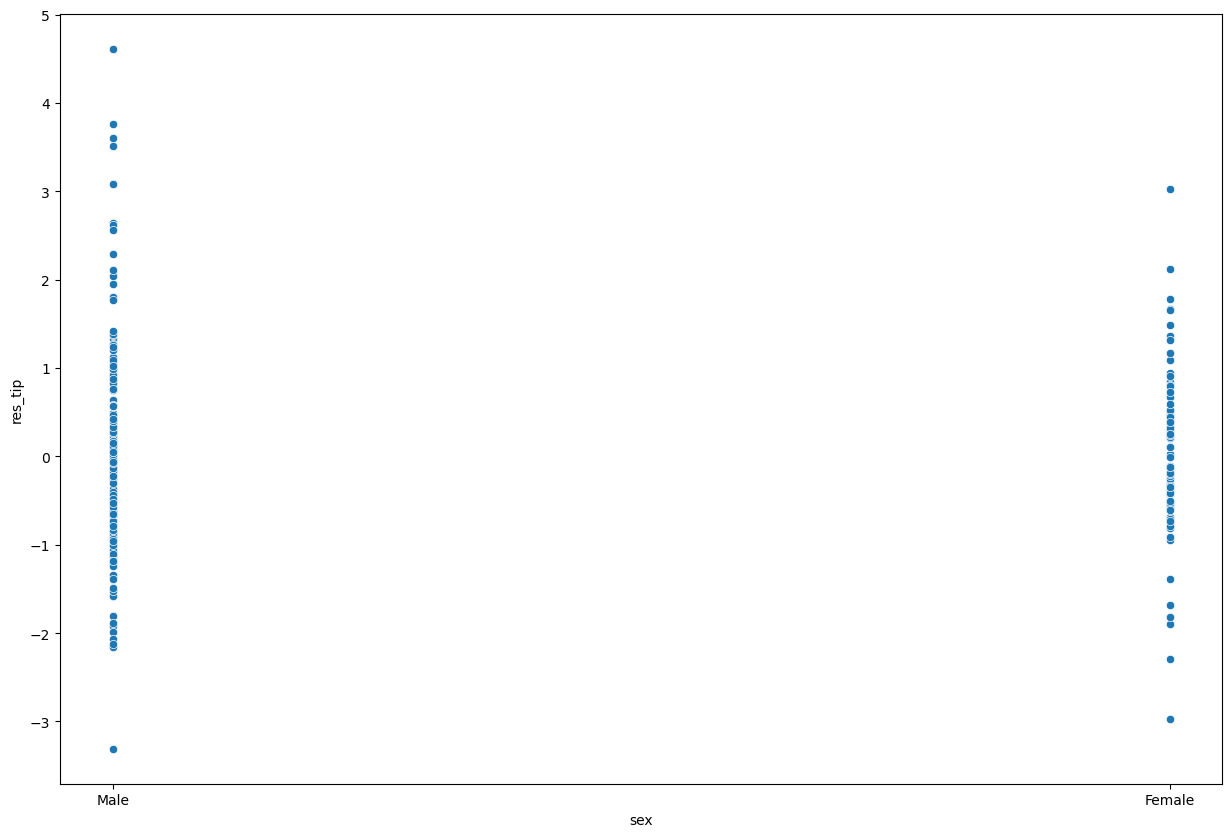

In [120]:
plt.close('all')
sns.scatterplot(x='sex', y='res_tip', data=tips)

In [142]:
reg_tip = smf.ols('tip ~ smoker + net_bill', data=tips).fit()
tips['res_tip'] = reg_tip.resid
reg_tip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.67
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           4.56e-22
Time:                        11:15:13   Log-Likelihood:                -375.20
No. Observations:                 244   AIC:                             756.4
Df Residuals:                     241   BIC:                             766.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2318      0.200      6.172      0.000       0.839       1.625
smoker[T.No]     0.1385      0.150      0.923      0.357      -0.157       0.434
net_bill         0.1001      0.009     11.015      0.000       0.082       0.118
==============================================================================
Omnibus:                       37.031   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.928
Skew:                           0.809   Prob(JB):                     2.93e-15
Kurtosis:                       4.991   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='smoker', ylabel='res_tip'>

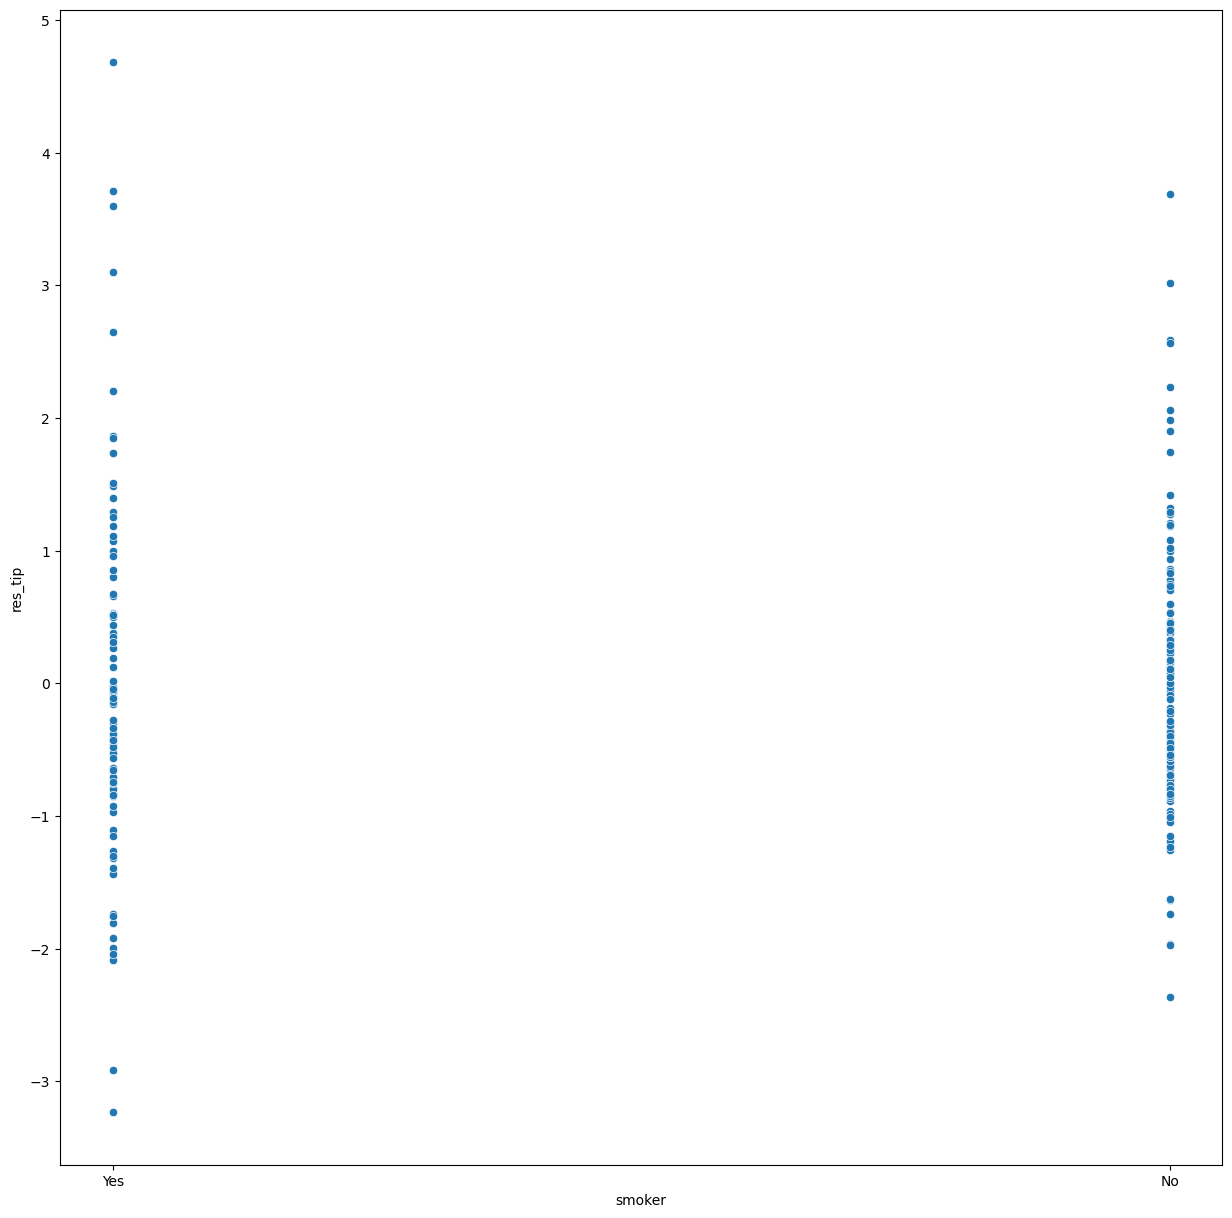

In [143]:
plt.close('all')
sns.scatterplot(x='smoker', y='res_tip', data=tips)

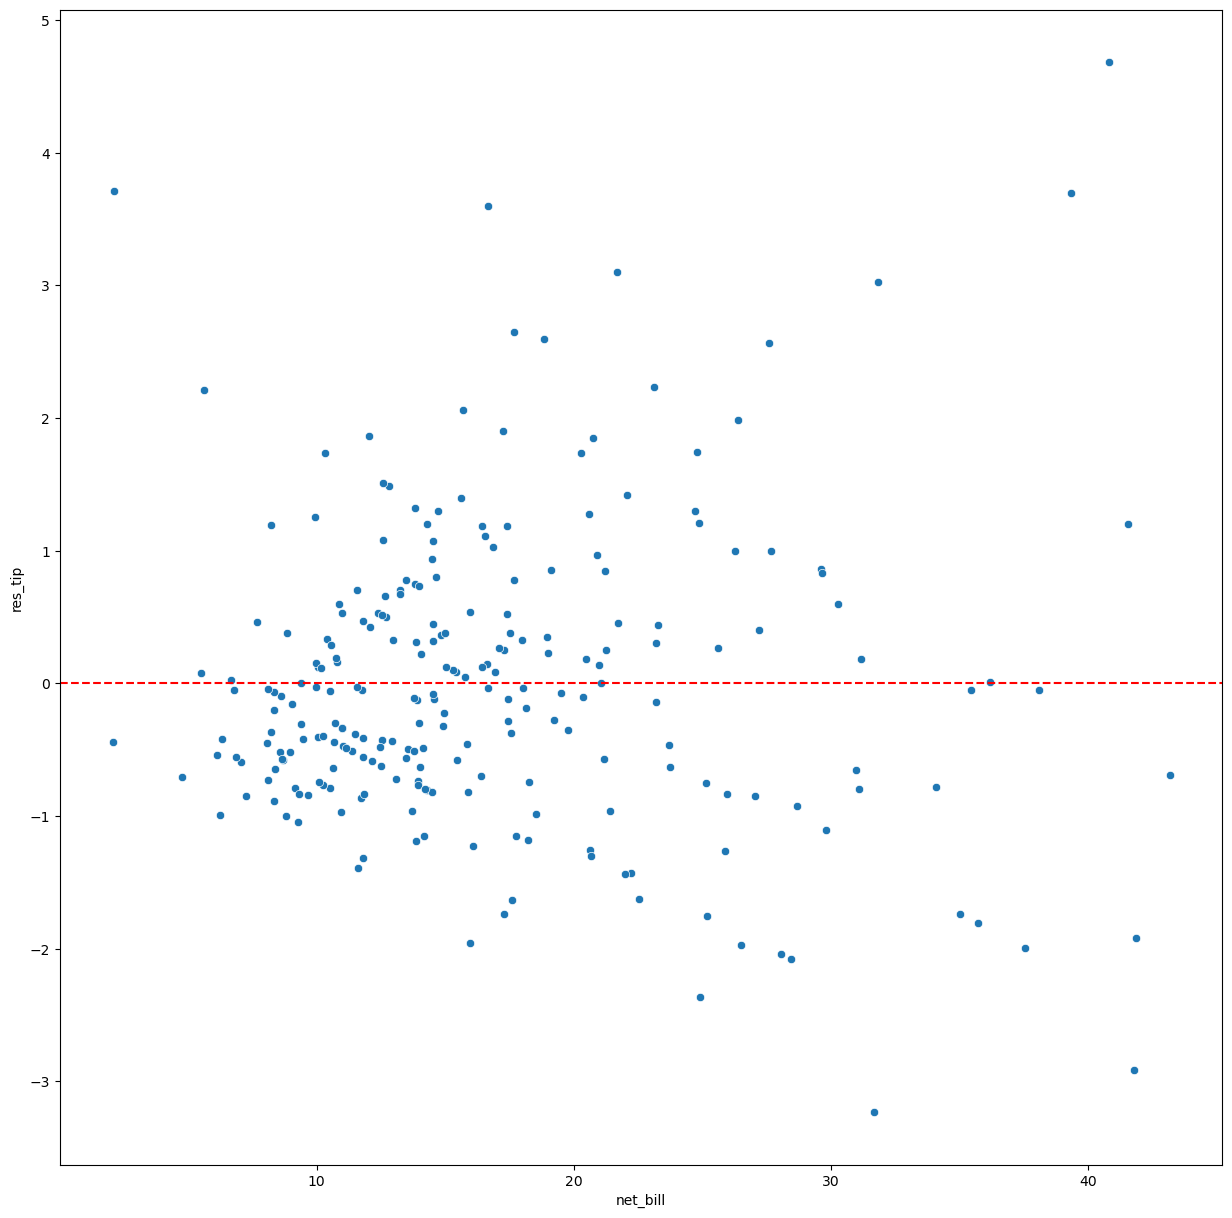

In [144]:
plt.close('all')
sns.scatterplot(x='net_bill', y='res_tip', data=tips)
plt.axhline(y=0, color='r', linestyle='--')

In [123]:
# log de net_bill
reg_tip = smf.ols('tip ~ smoker + np.log(net_bill)', data=tips).fit()
tips['res_tip'] = reg_tip.resid
reg_tip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.34
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           5.38e-19
Time:                        11:00:09   Log-Likelihood:                -382.36
No. Observations:                 244   AIC:                             770.7
Df Residuals:                     241   BIC:                             781.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2890      0.445     -2.896      0.004      -2.166      -0.412
smoker[T.No]         0.0433      0.154      0.282      0.779      -0.260       0.347
np.log(net_bill)     1.5712      0.157     10.034      0.000       1.263       1.880
==============================================================================
Omnibus:                       75.168   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.823
Skew:                           1.320   Prob(JB):                     3.38e-50
Kurtosis:                       6.929   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
# polinômio de net_bill
reg_tip = smf.ols('tip ~ smoker + np.power(net_bill, 2)', data=tips).fit()
tips['res_tip'] = reg_tip.resid
reg_tip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     52.69
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           1.04e-19
Time:                        11:00:10   Log-Likelihood:                -380.70
No. Observations:                 244   AIC:                             767.4
Df Residuals:                     241   BIC:                             777.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.1421      0.147     14.586      0.000       1.853       2.431
smoker[T.No]              0.1696      0.154      1.102      0.271      -0.133       0.473
np.power(net_bill, 2)     0.0022      0.000     10.265      0.000       0.002       0.003
==============================================================================
Omnibus:                       25.317   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.501
Skew:                           0.672   Prob(JB):                     1.95e-08
Kurtosis:                       4.298   Cond. No.                     1.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [132]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   total_bill     244 non-null    float64 
 1   tip            244 non-null    float64 
 2   sex            244 non-null    category
 3   smoker         244 non-null    category
 4   day            244 non-null    category
 5   time           244 non-null    category
 6   size           244 non-null    int64   
 7   tip_pct        244 non-null    float64 
 8   net_bill       244 non-null    float64 
 9   res_tip        244 non-null    float64 
 10  res_tip_pct_1  244 non-null    float64 
 11  res_tip_pct_2  244 non-null    float64 
 12  res_tip_pct_3  244 non-null    float64 
 13  res_tip_pct_4  244 non-null    float64 
dtypes: category(4), float64(9), int64(1)
memory usage: 20.7 KB


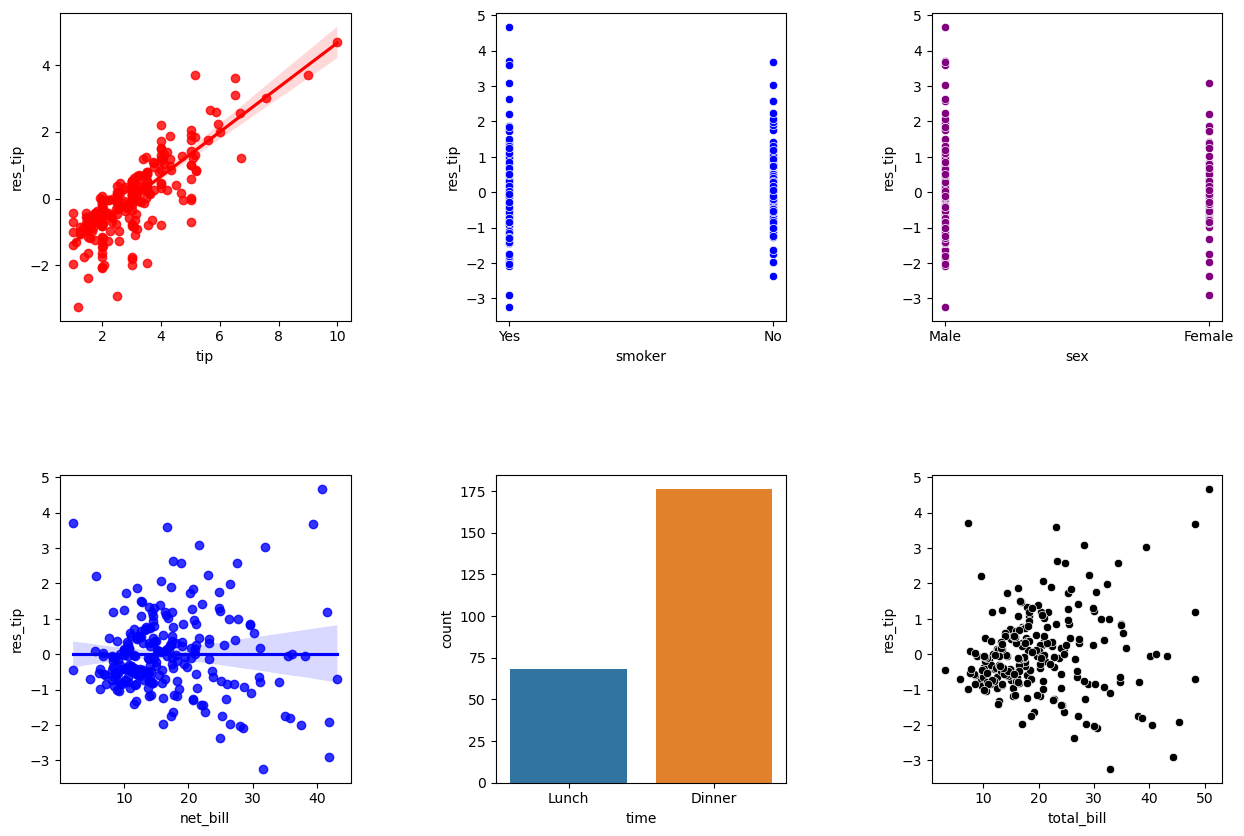

In [150]:
#sex + smoker + time + net_bill
plt.close('all')

plt.rc('figure', figsize=(15, 10))
fig, axes = plt.subplots(2, 3)

sns.regplot(ax = axes[0, 0],x=tips['tip'], y=tips['res_tip'], color='red');
sns.scatterplot(ax = axes[0, 1],x=tips['smoker'], y=tips['res_tip'], color='blue');
sns.scatterplot(ax = axes[0, 2],x=tips['sex'], y=tips['res_tip'], color='purple');
sns.regplot(ax = axes[1, 0],x=tips['net_bill'], y=tips['res_tip'], color='blue');
sns.countplot(ax = axes[1, 1],x=tips['time'], data=tips['res_tip']);
sns.scatterplot(ax = axes[1, 2],x=tips['total_bill'], y=tips['res_tip'], color='black');

plt.subplots_adjust(wspace=0.5, hspace=0.5)

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [48]:
reg_tip_pct_1 = smf.ols('tip_pct ~ sex + smoker + time + net_bill', data=tips).fit()
tips['res_tip_pct_1'] = reg_tip_pct_1.resid
reg_tip_pct_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     7.157
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           1.85e-05
Time:                        10:13:13   Log-Likelihood:                 110.12
No. Observations:                 244   AIC:                            -210.2
Df Residuals:                     239   BIC:                            -192.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3216      0.033      9.698      0.000       0.256       0.387
sex[T.Female]     -0.0069      0.021     -0.321      0.749      -0.049       0.035
smoker[T.No]      -0.0351      0.021     -1.700      0.090      -0.076       0.006
time[T.Dinner]     0.0221      0.023      0.961      0.337      -0.023       0.067
net_bill          -0.0066      0.001     -5.191      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      461.972   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           218184.236
Skew:                          10.789   Prob(JB):                         0.00
Kurtosis:                     147.897   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
reg_tip_pct_2 = smf.ols('tip_pct ~ smoker + net_bill', data=tips).fit()
tips['res_tip_pct_2'] = reg_tip_pct_2.resid
reg_tip_pct_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     13.77
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           2.17e-06
Time:                        10:13:13   Log-Likelihood:                 109.52
No. Observations:                 244   AIC:                            -213.0
Df Residuals:                     241   BIC:                            -202.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.3309      0.027     12.087      0.000       0.277       0.385
smoker[T.No]    -0.0358      0.021     -1.739      0.083      -0.076       0.005
net_bill        -0.0063      0.001     -5.093      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      464.437   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           224133.702
Skew:                          10.904   Prob(JB):                         0.00
Kurtosis:                     149.869   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

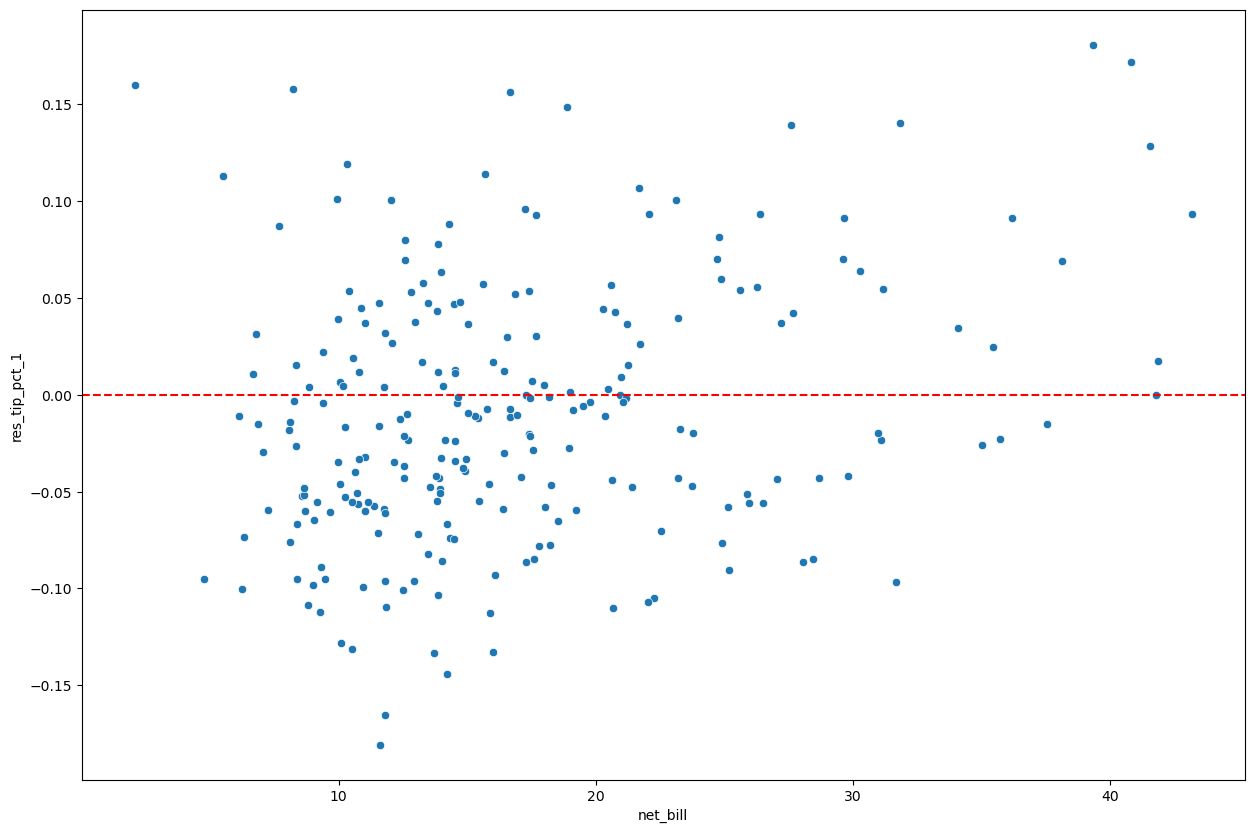

In [50]:
plt.close('all')
sns.scatterplot(x='net_bill', y='res_tip_pct_1', data=tips[tips['tip_pct'] < .5])
plt.axhline(y=0, color='r', linestyle='--')

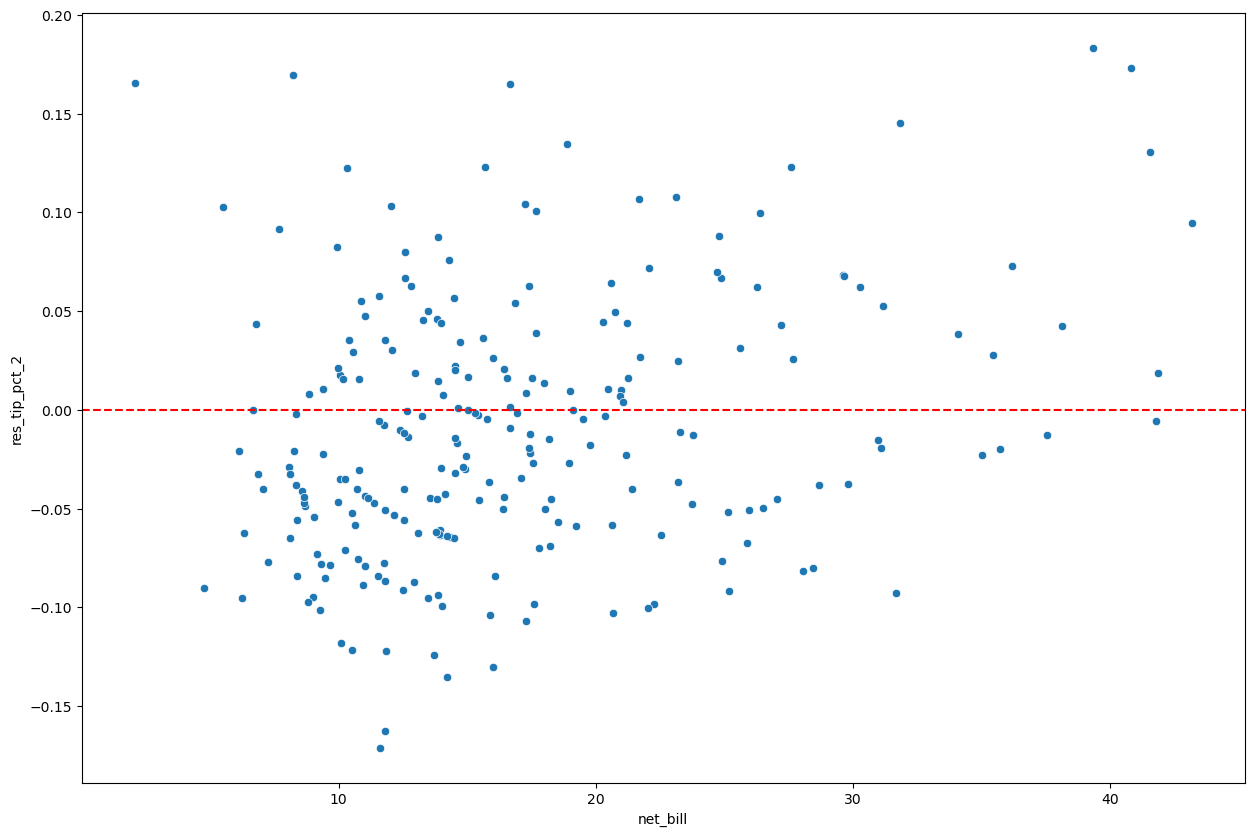

In [51]:
plt.close('all')
sns.scatterplot(x='net_bill', y='res_tip_pct_2', data=tips[tips['tip_pct'] < .5])
plt.axhline(y=0, color='r', linestyle='--')

In [52]:
# log de net_bill
reg_tip_pct_3 = smf.ols('tip_pct ~ smoker + np.log(net_bill)', data=tips).fit()
tips['res_tip_pct_3'] = reg_tip_pct_3.resid
reg_tip_pct_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     32.17
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           4.13e-13
Time:                        10:13:14   Log-Likelihood:                 125.19
No. Observations:                 244   AIC:                            -244.4
Df Residuals:                     241   BIC:                            -233.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6412      0.056     11.533      0.000       0.532       0.751
smoker[T.No]        -0.0319      0.019     -1.657      0.099      -0.070       0.006
np.log(net_bill)    -0.1547      0.020     -7.907      0.000      -0.193      -0.116
==============================================================================
Omnibus:                      436.655   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           163563.737
Skew:                           9.667   Prob(JB):                         0.00
Kurtosis:                     128.357   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# polinômio de net_bill
reg_tip_pct_4 = smf.ols('tip_pct ~ smoker + np.power(net_bill, 2)', data=tips).fit()
tips['res_tip_pct_4'] = reg_tip_pct_4.resid
reg_tip_pct_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     8.215
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           0.000354
Time:                        10:13:14   Log-Likelihood:                 104.37
No. Observations:                 244   AIC:                            -202.7
Df Residuals:                     241   BIC:                            -192.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.2628      0.020     13.064      0.000       0.223       0.302
smoker[T.No]             -0.0355      0.021     -1.687      0.093      -0.077       0.006
np.power(net_bill, 2)    -0.0001    2.9e-05     -3.859      0.000      -0.000   -5.47e-05
==============================================================================
Omnibus:                      467.947   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           232494.687
Skew:                          11.070   Prob(JB):                         0.00
Kurtosis:                     152.593   Cond. No.                     1.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
print(f"R² do Modelo 1: {reg_tip_pct_1.rsquared*100:.2f}%")
print(f"R² do Modelo 3: {reg_tip_pct_3.rsquared*100:.2f}%")

R² do Modelo 1: 10.70%
R² do Modelo 3: 21.07%


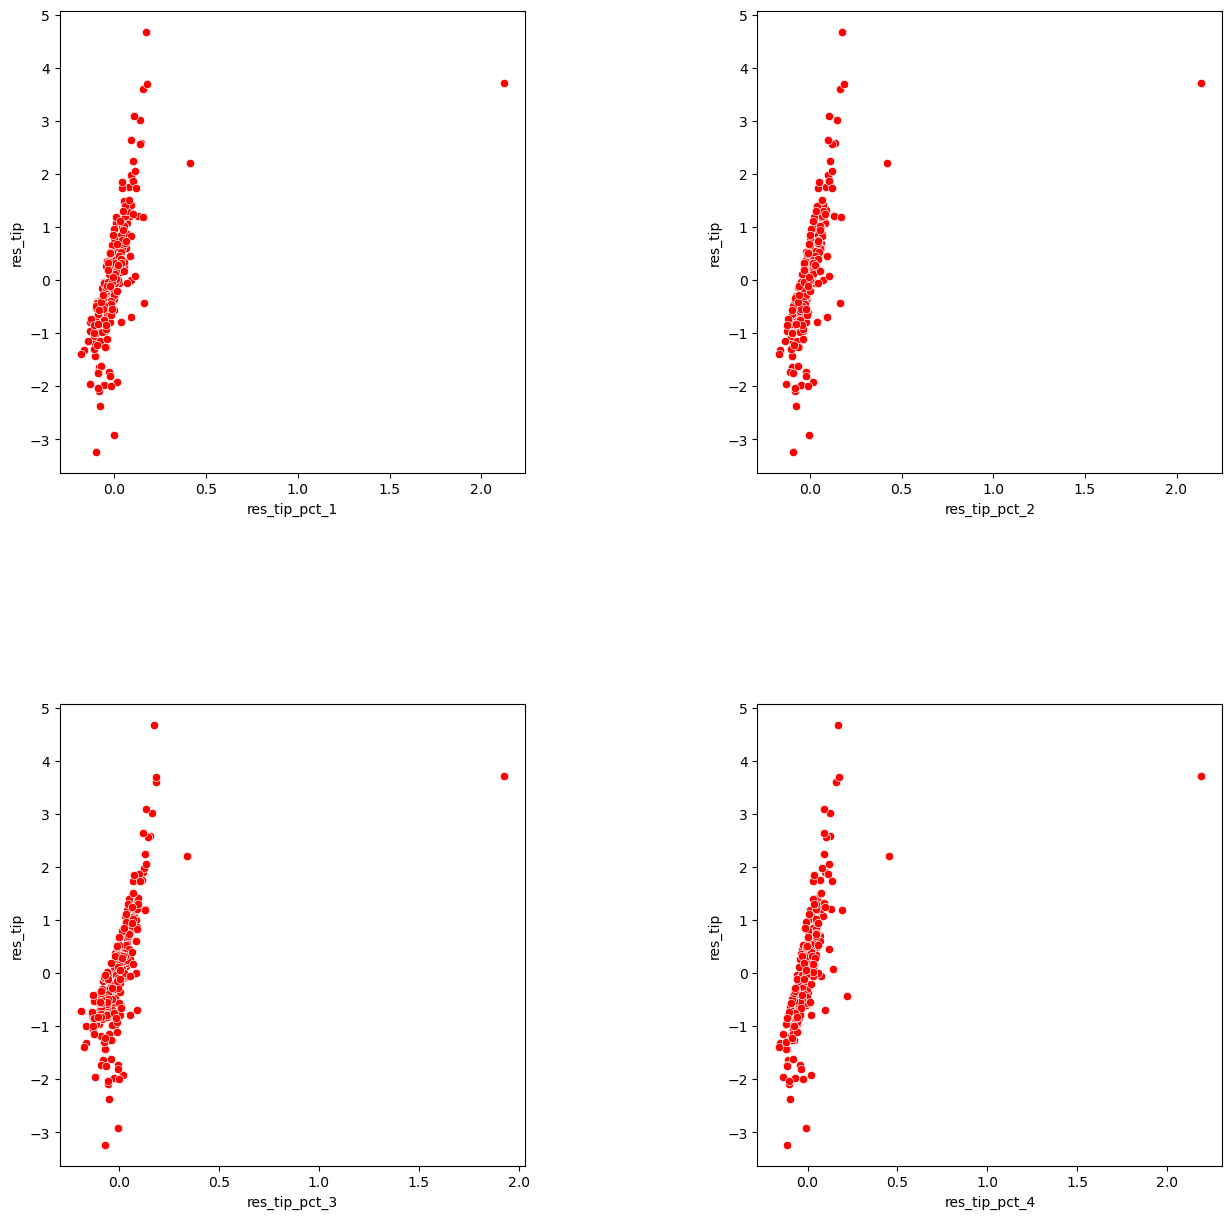

In [145]:
plt.close('all')

plt.rc('figure', figsize=(15, 15))
fig, axes = plt.subplots(2, 2)

sns.scatterplot(ax = axes[0, 0],x=tips['res_tip_pct_1'], y=tips['res_tip'], color='red');
sns.scatterplot(ax = axes[0, 1],x=tips['res_tip_pct_2'], y=tips['res_tip'], color='red');
sns.scatterplot(ax = axes[1, 0],x=tips['res_tip_pct_3'], y=tips['res_tip'], color='red');
sns.scatterplot(ax = axes[1, 1],x=tips['res_tip_pct_4'], y=tips['res_tip'], color='red');

plt.subplots_adjust(wspace=0.5, hspace=0.5)

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [55]:
df = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [56]:
reg_renda_simples = smf.ols('renda ~ tempo_emprego', data=df).fit()
df['res_renda_simples'] = reg_renda_simples.resid
reg_renda_simples.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:13:15   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

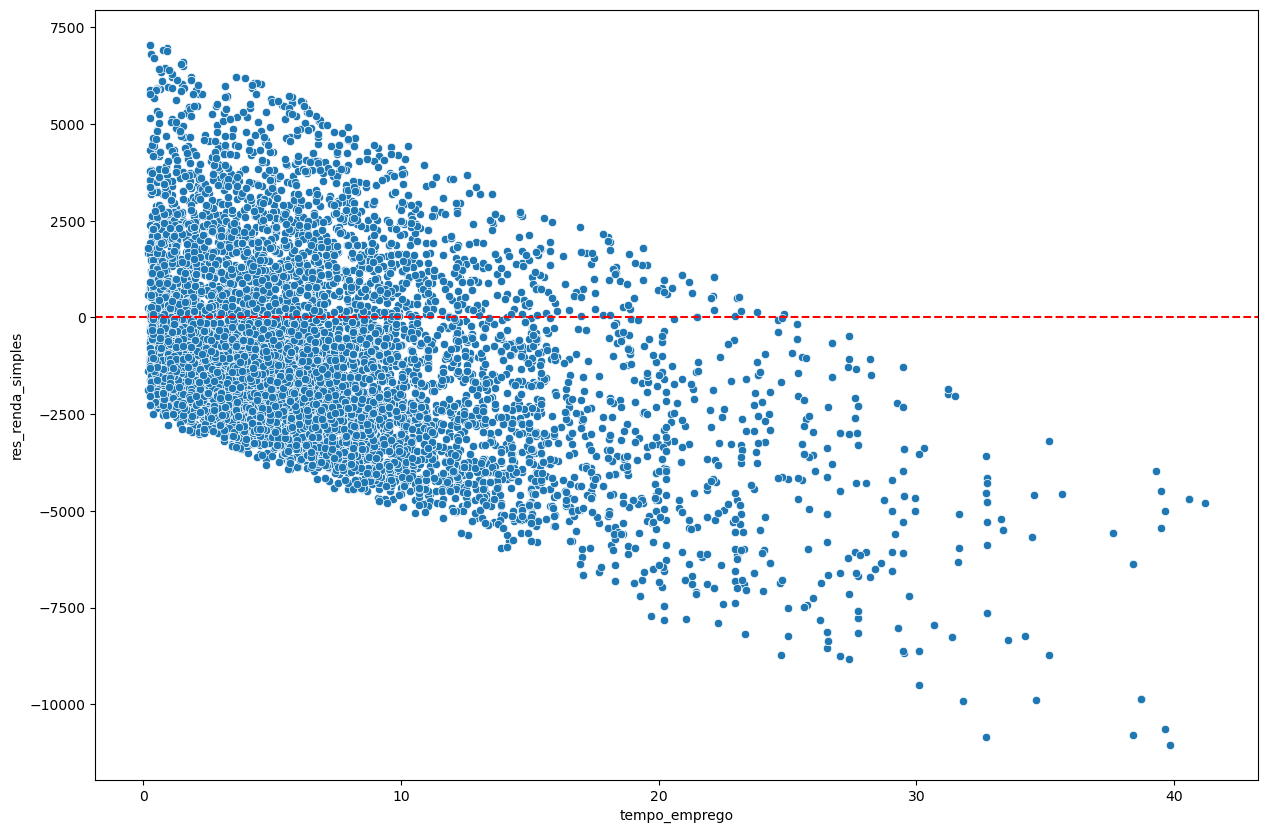

In [73]:
# tratando outlier de renda para facilitar a visualização
plt.close('all')
sns.scatterplot(x='tempo_emprego', y='res_renda_simples', data=df[df['renda'] < 10000])
# sns.scatterplot(x='tempo_emprego', y='res_renda_simples', data=df)
plt.axhline(y=0, color='r', linestyle='--')

In [58]:
# log em y
reg_renda_simples_2 = smf.ols('np.log(renda) ~ tempo_emprego', data=df).fit()
df['res_renda_simples_2'] = reg_renda_simples_2.resid
reg_renda_simples_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     2098.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:13:16   Log-Likelihood:                -13960.
No. Observations:               12466   AIC:                         2.792e+04
Df Residuals:                   12464   BIC:                         2.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8074      0.010    774.002      0.000       7.788       7.827
tempo_emprego     0.0449      0.001     45.802      0.000       0.043       0.047
==============================================================================
Omnibus:                        3.082   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                3.050
Skew:                           0.034   Prob(JB):                        0.218
Kurtosis:                       3.037   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

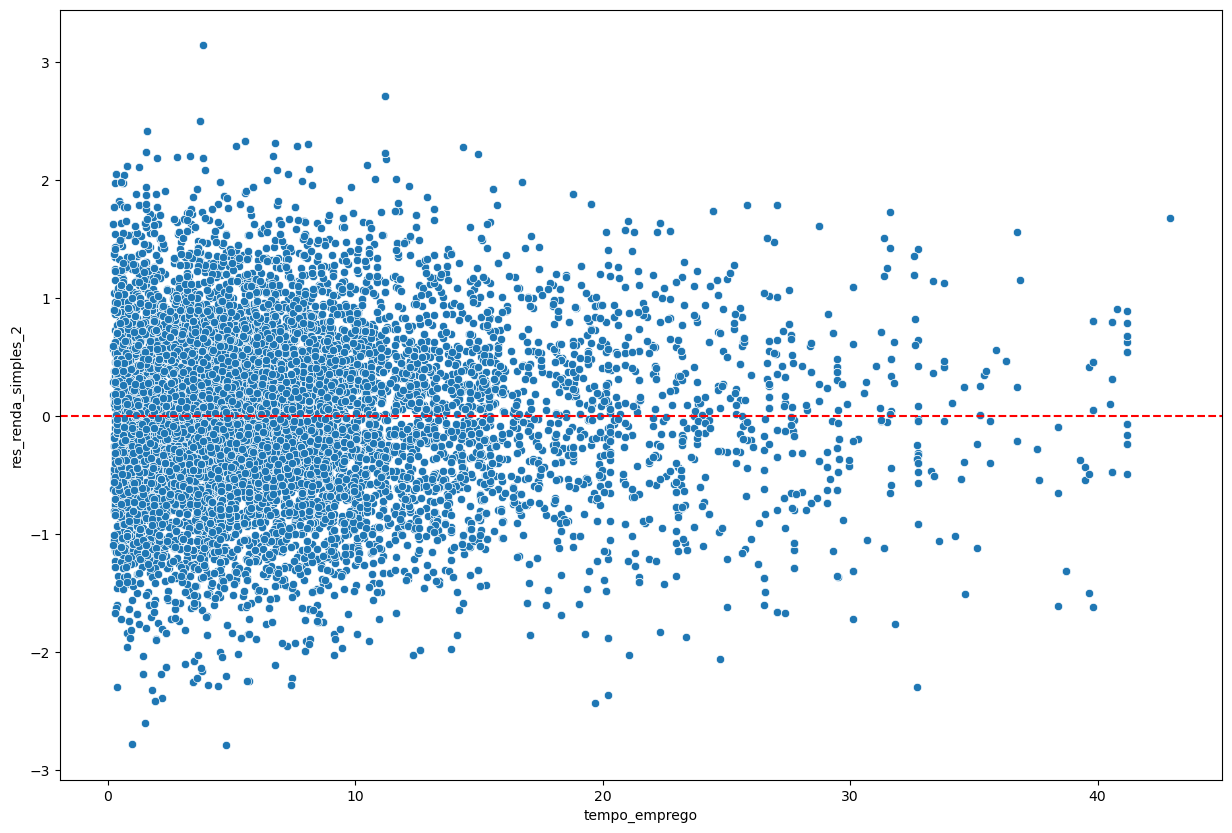

In [59]:
plt.close('all')
sns.scatterplot(x='tempo_emprego', y='res_renda_simples_2', data=df)
plt.axhline(y=0, color='r', linestyle='--')

In [60]:
print(f"O R² do segundo modelo diminuiu, porém, o 'coef' e 'std err' se aproximaram de 0.")
print(f"R² do Modelo 1: {reg_renda_simples.rsquared*100:.2f}%")
print(f"R² do Modelo 2: {reg_renda_simples_2.rsquared*100:.2f}%")

O R² do segundo modelo diminuiu, porém, o 'coef' e 'std err' se aproximaram de 0.
R² do Modelo 1: 15.54%
R² do Modelo 2: 14.41%


In [61]:
reg_renda_multi = smf.ols('renda ~ data_ref + sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia + mau', data=df).fit()
df['res_renda_multi'] = reg_renda_multi.resid
reg_renda_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     90.76
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:13:17   Log-Likelihood:            -1.2198e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12426   BIC:                         2.443e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         -184.8312   1682.790     -0.110      0.913   -3483.360    3113.698
data_ref[T.2015-02-01]              28.8921    211.111      0.137      0.891    -384.918     442.702
data_ref[T.2015-03-01]              34.5094    210.914      0.164      0.870    -378.914     447.933
data_ref[T.2015-04-01]             -50.4359    211.468     -0.239      0.811    -464.947     364.075
data_ref[T.2015-05-01]            -157.2451    209.715     -0.750      0.453    -568.319     253.829
data_ref[T.2015-06-01]               7.9744    211.744      0.038      0.970    -407.076     423.024
data_ref[T.2015-07-01]             -92.2468    211.949     -0.435      0.663    -507.699     323.206
data_ref[T.2015-08-01]            -229.9582    212.166     -1.084      0.278    -645.835     185.919
data_ref[T.2015-09-01]            -258.5927    211.251     -1.224      0.221    -672.677     155.491
data_ref[T.2015-10-01]              20.7689    210.707      0.099      0.921    -392.249     433.787
data_ref[T.2015-11-01]            -166.0106    210.843     -0.787      0.431    -579.296     247.275
data_ref[T.2015-12-01]            -374.6998    211.096     -1.775      0.076    -788.481      39.082
data_ref[T.2016-01-01]            -256.6139    210.778     -1.217      0.223    -669.771     156.544
data_ref[T.2016-02-01]              88.9340    210.967      0.422      0.673    -324.595     502.463
data_ref[T.2016-03-01]             120.9274    211.119      0.573      0.567    -292.898     534.753
sexo[T.M]                         2363.4597     88.166     26.807      0.000    2190.641    2536.278
posse_de_veiculo[T.True]           -80.6067     84.807     -0.950      0.342    -246.841      85.627
posse_de_imovel[T.True]            349.5413     83.488      4.187      0.000     185.893     513.190
tipo_renda[T.Bolsista]            -842.7460   2157.164     -0.391      0.696   -5071.122    3385.630
tipo_renda[T.Empresário]          1022.2036     90.197     11.333      0.000     845.404    1199.003
tipo_renda[T.Pensionista]         1820.5646   1459.996      1.247      0.212   -1041.253    4682.383
tipo_renda[T.Servidor público]     430.0879    130.665      3.292      0.001     173.964     686.212
educacao[T.Pós graduação]         2165.9613   1081.801      2.002      0.045      45.463    4286.460
educacao[T.Secundário]            -251.3129    437.978     -0.574      0.566   -1109.818     607.192
educacao[T.Superior completo]      341.8032    439.888      0.777      0.437    -520.445    1204.051
educacao[T.Superior incompleto]   -305.1668    471.161     -0.648      0.517   -1228.714     618.381
estado_civil[T.Separado]           152.4936    807.503      0.189      0.850   -1430.337    1735.324
estado_civil[T.Solteiro]           380.1467    792.76

In [96]:
reg_renda_multi_2 = smf.ols('np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + np.power(idade, 2) + tempo_emprego',data=df).fit()
df['res_renda_multi_2'] = reg_renda_multi_2.resid
reg_renda_multi_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     727.8
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:30:58   Log-Likelihood:                -13332.
No. Observations:               12466   AIC:                         2.668e+04
Df Residuals:                   12460   BIC:                         2.672e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    7.4483      0.019    384.766      0.000       7.410       7.486
sexo[T.M]                    0.4680      0.014     32.916      0.000       0.440       0.496
posse_de_veiculo[T.True]     0.0177      0.014      1.291      0.197      -0.009       0.044
posse_de_imovel[T.True]      0.1013      0.013      7.608      0.000       0.075       0.127
np.power(idade, 2)        5.448e-05   8.51e-06      6.404      0.000    3.78e-05    7.12e-05
tempo_emprego                0.0478      0.001     48.287      0.000       0.046       0.050
==============================================================================
Omnibus:                        1.245   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.536   Jarque-Bera (JB):                1.218
Skew:                           0.012   Prob(JB):                        0.544
Kurtosis:                       3.042   Cond. No.                     6.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
print(f"R² do Modelo 1: {reg_renda_multi.rsquared*100:.2f}%")
print(f"R² do Modelo 2: {reg_renda_multi_2.rsquared*100:.2f}%")

R² do Modelo 1: 22.17%
R² do Modelo 2: 22.60%


<AxesSubplot:xlabel='sexo', ylabel='res_renda_multi_2'>

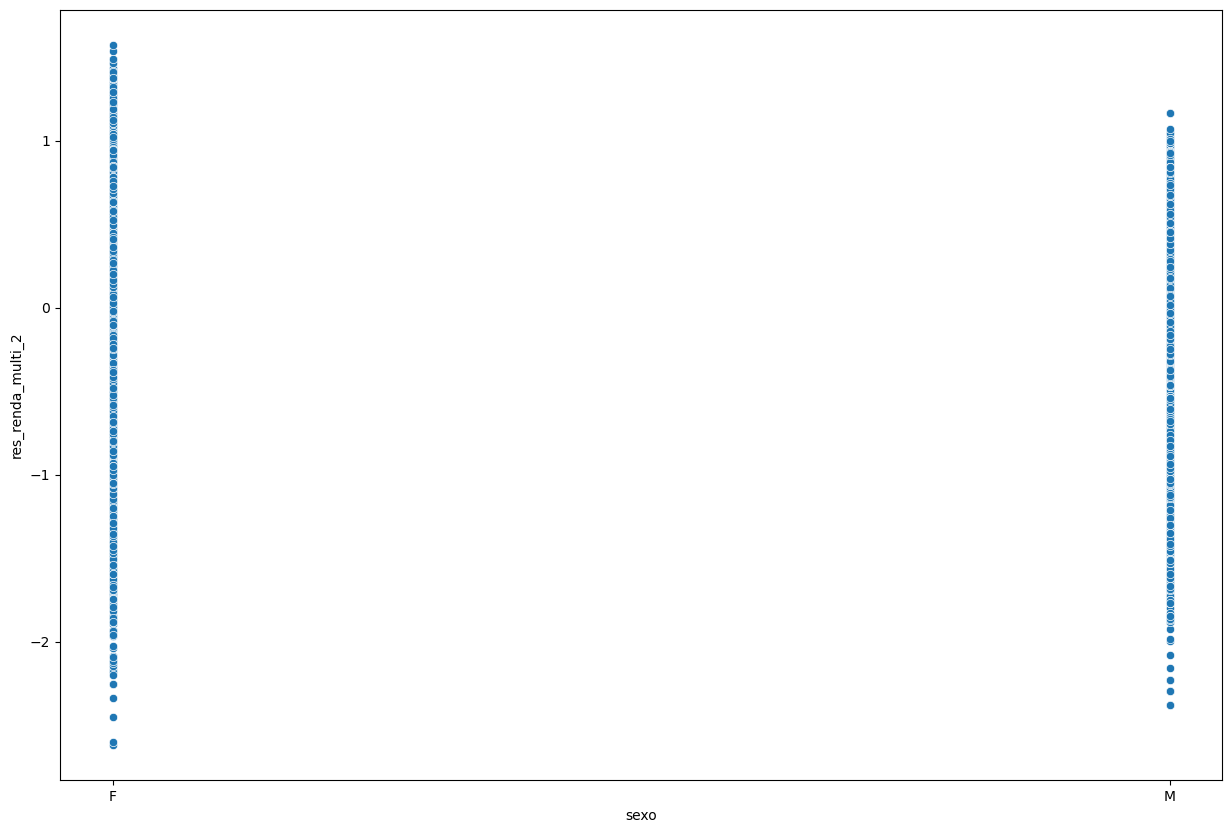

In [98]:
# resíduo sexo
sns.scatterplot(x='sexo', y='res_renda_multi_2', data=df[df['renda'] < 10000])

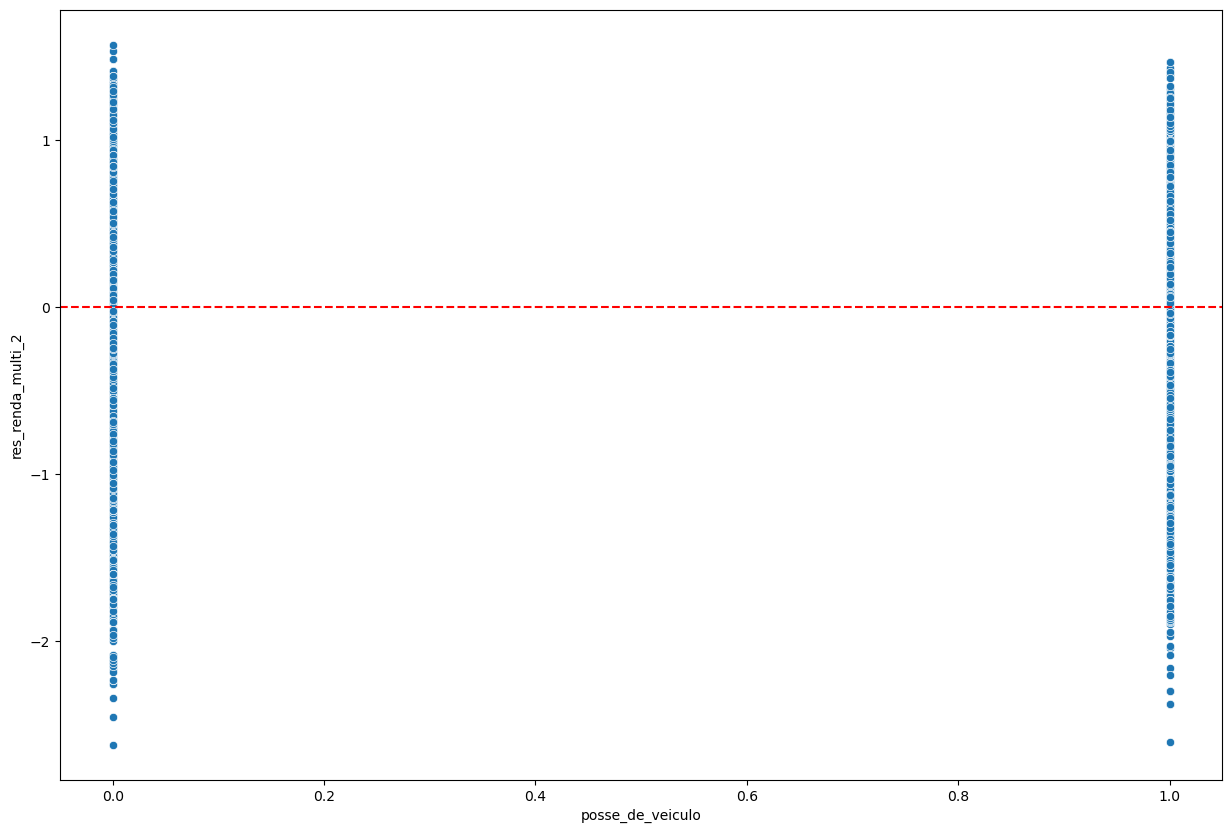

In [99]:
# resíduo veiculo
sns.scatterplot(x='posse_de_veiculo', y='res_renda_multi_2', data=df[df['renda'] < 10000])
# sns.scatterplot(x='veiculo', y='res_renda_multi_2', data=df)
plt.axhline(y=0, color='r', linestyle='--')

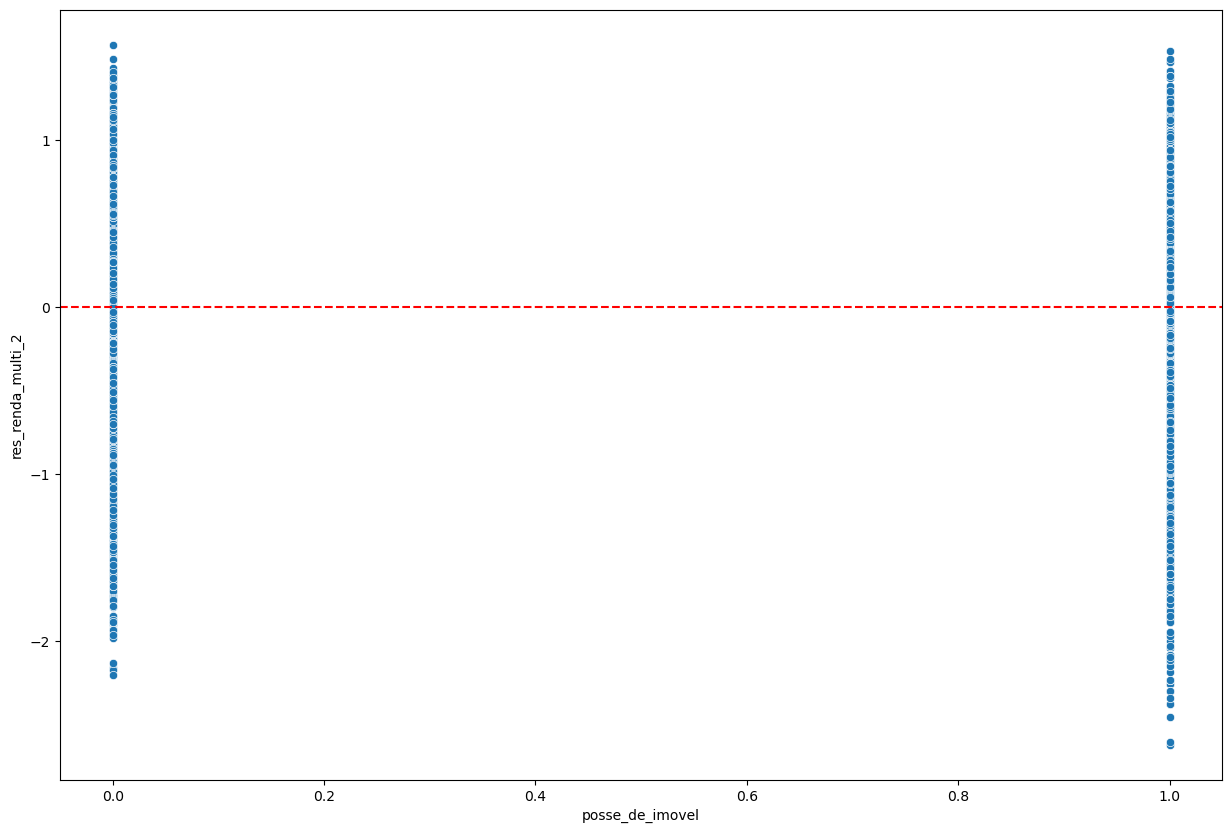

In [100]:
# resíduo posse de imovel
sns.scatterplot(x='posse_de_imovel', y='res_renda_multi_2', data=df[df['renda'] < 10000])
# sns.scatterplot(x='imovel', y='res_renda_multi_2', data=df)
plt.axhline(y=0, color='r', linestyle='--')

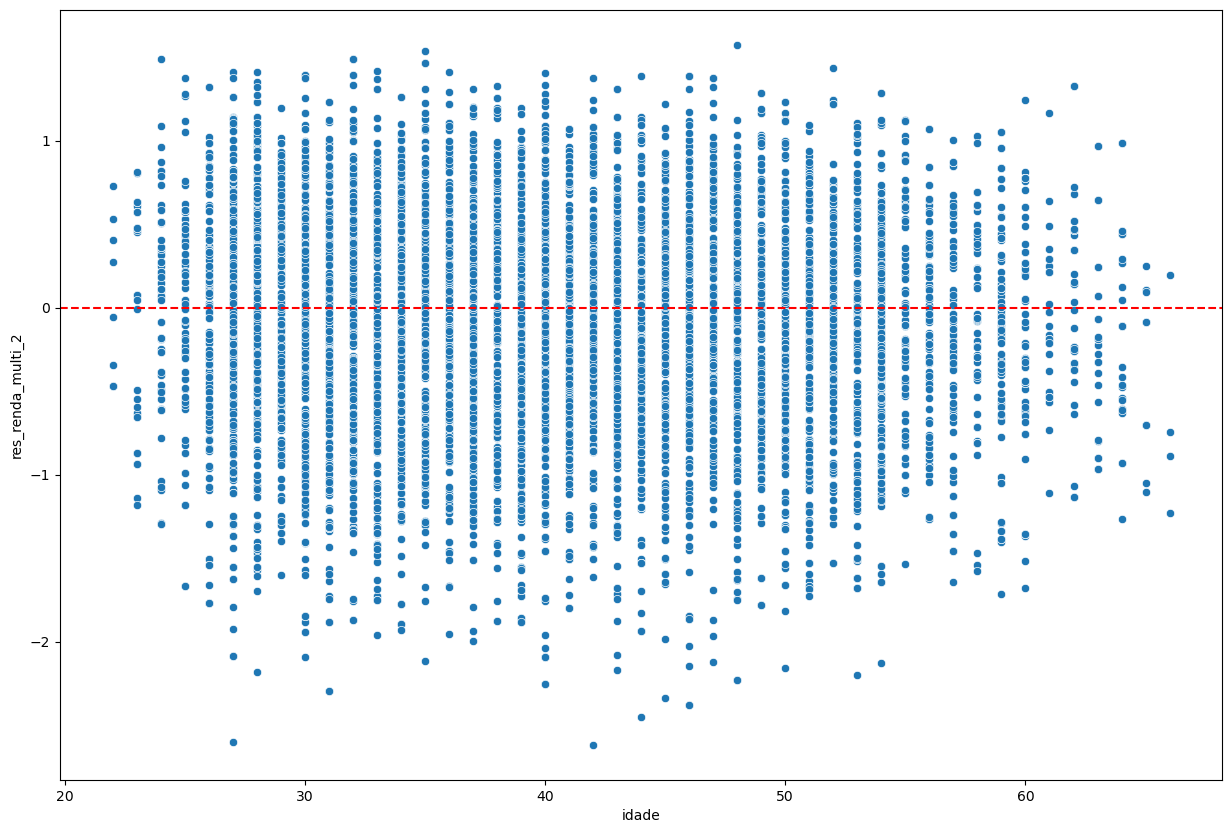

In [101]:
# resíduo idade
sns.scatterplot(x='idade', y='res_renda_multi_2', data=df[df['renda'] < 10000])
# sns.scatterplot(x='idade', y='res_renda_multi_2', data=df)
plt.axhline(y=0, color='r', linestyle='--')

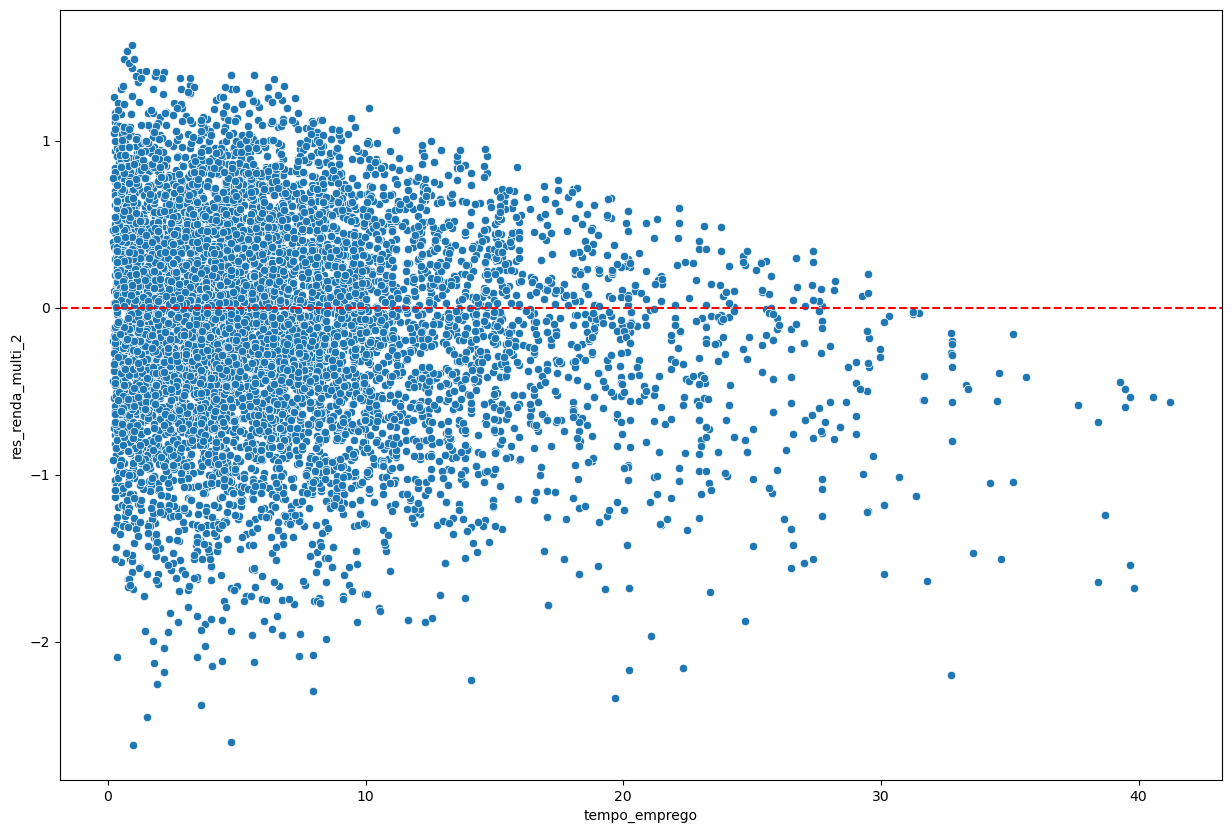

In [102]:
# resíduo tempo_emprego
sns.scatterplot(x='tempo_emprego', y='res_renda_multi_2', data=df[df['renda'] < 10000])
# sns.scatterplot(x='tempo_emprego', y='res_renda_multi_2', data=df)
plt.axhline(y=0, color='r', linestyle='--')

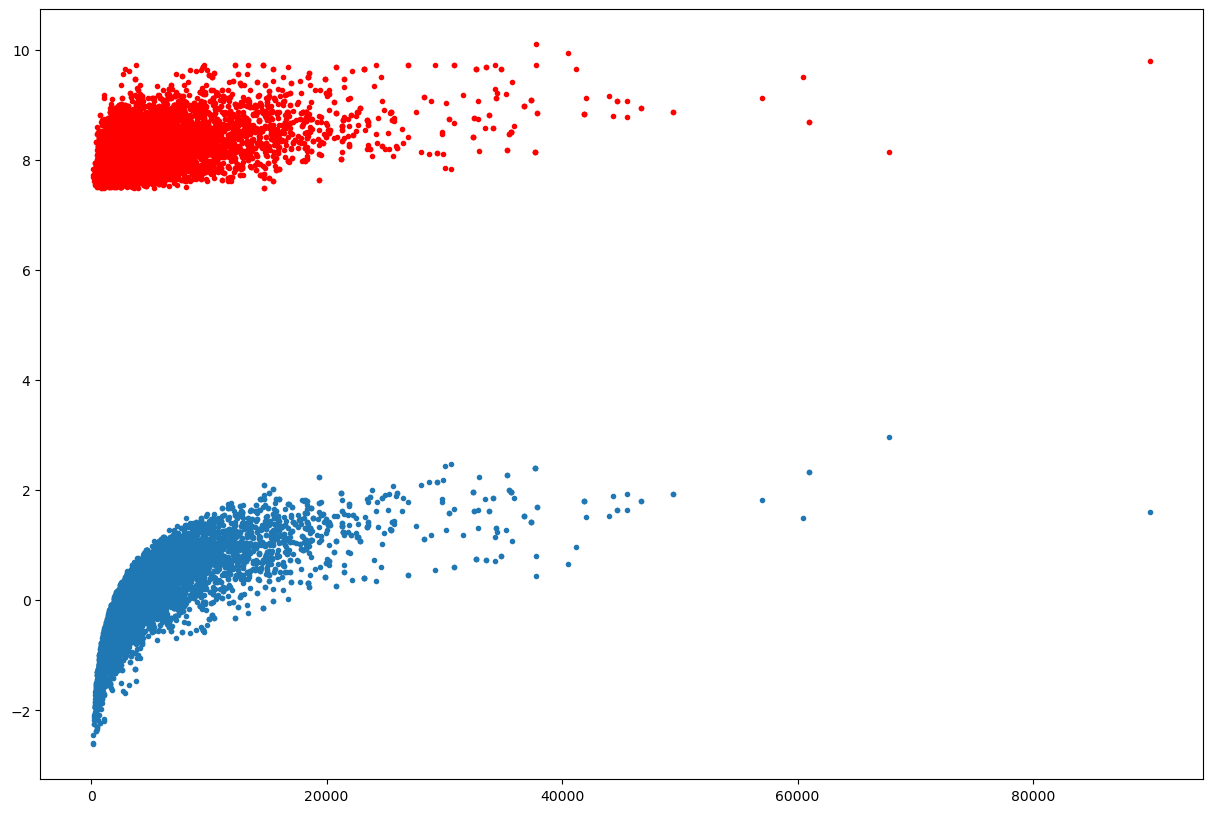

In [103]:
df['pred'] = reg_renda_multi_2.fittedvalues

plt.plot(df['renda'], df['res_renda_multi_2'], '.')
plt.plot(df['renda'], df['pred'], 'r.')

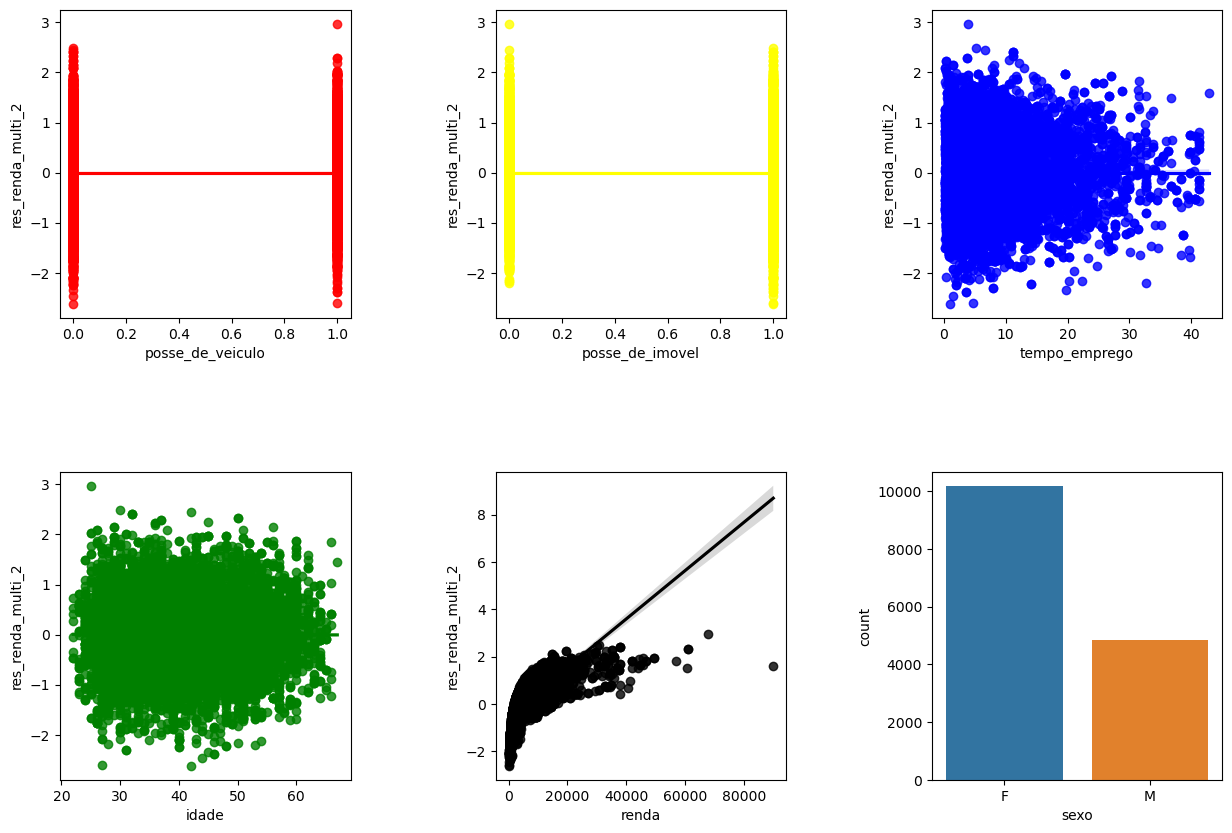

In [107]:
plt.close('all')

plt.rc('figure', figsize=(15, 10))
fig, axes = plt.subplots(2, 3)

sns.regplot(ax = axes[0, 0],x=df['posse_de_veiculo'], y=df['res_renda_multi_2'], color='red');
sns.regplot(ax = axes[0, 1],x=df['posse_de_imovel'], y=df['res_renda_multi_2'], color='yellow');
sns.regplot(ax = axes[0, 2],x=df['tempo_emprego'], y=df['res_renda_multi_2'], color='blue');
sns.regplot(ax = axes[1, 0],x=df['idade'], y=df['res_renda_multi_2'], color='green');
sns.regplot(ax = axes[1, 1],x=df['renda'], y=df['res_renda_multi_2'], color='black');
sns.countplot(ax = axes[1, 2],x=df['sexo'], data=df['res_renda_multi_2']);


plt.subplots_adjust(wspace=0.5, hspace=0.5)